In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
os.chdir('/gdrive/My Drive')

In [ ]:
df = pd.read_csv('CFD/creditcard.csv',encoding='latin1')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
## Data Cleaning

In [ ]:
# Outliers

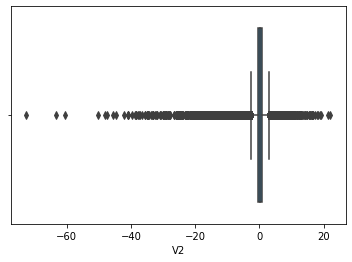

In [ ]:
sns.boxplot(x='V2', data=df)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Time      85119.000000
V1            2.236015
V2            1.402274
V3            1.917560
V4            1.591981
V5            1.303524
V6            1.166861
V7            1.124512
V8            0.535976
V9            1.240237
V10           0.989349
V11           1.502088
V12           1.023810
V13           1.311044
V14           0.918724
V15           1.231705
V16           0.991333
V17           0.883423
V18           0.999657
V19           0.915248
V20           0.344762
V21           0.414772
V22           1.070904
V23           0.309488
V24           0.794113
V25           0.667861
V26           0.567936
V27           0.161885
V28           0.131240
Amount       71.565000
Class         0.000000
dtype: float64


In [ ]:
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

         Time     V1     V2     V3     V4  ...    V26    V27    V28  Amount  Class
0       False  False  False  False  False  ...  False  False  False   False  False
1       False  False  False  False  False  ...  False  False  False   False  False
2       False  False  False  False  False  ...  False  False  False   False  False
3       False  False  False  False  False  ...  False  False  False   False  False
4       False  False  False  False  False  ...  False  False  False   False  False
...       ...    ...    ...    ...    ...  ...    ...    ...    ...     ...    ...
284802  False   True  False   True  False  ...  False  False  False   False  False
284803  False  False  False  False  False  ...  False  False  False   False  False
284804  False  False  False  False  False  ...  False  False  False   False  False
284805  False  False  False  False  False  ...  False  False  False   False  False
284806  False  False  False  False  False  ...  False  False  False   False  False

[28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,True,False,False,False,False,False,True,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True,False,True,True,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(df['V2'].quantile(0.5))
print(df['V2'].quantile(0.95))
print(df['V2'].quantile(0.75))

0.0654855563960555
1.808584753676
0.8037238712400947


In [ ]:
df['V2'] = np.where(df['V2'] > 1.08,0.80, df['V2'])

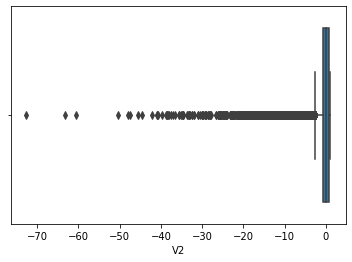

In [ ]:
sns.boxplot(x='V2',data=df)

In [ ]:
## Data Preprocessing

In [ ]:
df = df.drop(['Time'], axis=1)
print(f"list of feature names after removing Time column :- \n{df.columns}")

list of feature names after removing Time column :- 
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [ ]:
# Checking null or nan values 

In [ ]:
print(f"Dataset info :- \n {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [ ]:
## Data Transformation

In [ ]:
print(f"few values of Amount column :- \n {df['Amount'][0:4]}")

few values of Amount column :- 
 0    149.62
1      2.69
2    378.66
3    123.50
Name: Amount, dtype: float64


In [ ]:
df['norm_amount'] = StandardScaler().fit_transform(
df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'], axis=1)
print(f"few values of Amount column after applying StandardScaler:- \n {df['norm_amount'][0:4]}")

few values of Amount column after applying StandardScaler:- 
 0    0.244964
1   -0.342475
2    1.160686
3    0.140534
Name: norm_amount, dtype: float64


In [ ]:
# Splitting dataset 

In [ ]:
X = df.drop(['Class'], axis=1)
y = df[['Class']]

In [ ]:
# splitting dataset to train & test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364, 1)
(85443, 1)


In [ ]:
# classification
# Decision Tree Algorithm

In [ ]:
def decision_tree_classification(X_train, y_train, X_test, y_test):
    # initialize object for DecisionTreeClassifier class
    dt_classifier = DecisionTreeClassifier()
    print("Model training starts........")
    dt_classifier.fit(X_train, y_train.values.ravel())
    print("Model training completed")
    acc_score = dt_classifier.score(X_test, y_test)
    print(f'Accuracy of model on test dataset :- {acc_score}')
    # predict result using test dataset
    y_pred = dt_classifier.predict(X_test)
    # confusion matrix
    print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

decision_tree_classification(X_train, y_train, X_test, y_test)

Model training starts........
Model training completed
Accuracy of model on test dataset :- 0.9992392589211521
Confusion Matrix :- 
 [[85269    27]
 [   38   109]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.74      0.77       147

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Classification Evaluation Techniques.

In [ ]:
print(f"Number of samples under each target value :- \n {df['Class'].value_counts()}")

Number of samples under each target value :- 
 0    284315
1       492
Name: Class, dtype: int64


In [ ]:
# Accuracy

In [ ]:
def accuracy(y_true, y_pred):
	correct_labels = 0
	for true, pred in zip(y_true,y_pred):
		if true == pred:
			correct_labels += 1
	return correct_labels / len(y_true)


y_true = [1,0,1,1,1,0,0,1]  # Actual values of target column
y_pred = [1,1,1,1,1,1,0,1]  # predicted values by model
result = accuracy(y_true, y_pred)
print(f"Accuracy {result}")

Accuracy 0.75


In [ ]:
## Applying Sampling Techniques

In [ ]:
#Target Class Distribution

In [ ]:
class_val = df['Class'].value_counts()
print(f"Number of samples for each class :- \n {class_val}")
non_fraud = class_val[0]
fraud = class_val[1]
print(f"Non Fraudulent Numbers :- {non_fraud}")
print(f"Fraudulent Numbers :- {fraud}")

Number of samples for each class :- 
 0    284315
1       492
Name: Class, dtype: int64
Non Fraudulent Numbers :- 284315
Fraudulent Numbers :- 492


In [ ]:
# Changes-Equating Both Indexes As Equal

In [ ]:
# take indexes of non fraudulent
nonfraud_indexies = df[df.Class == 0].index
fraud_indices = np.array(df[df['Class'] == 1].index)
# take random samples from non fraudulent that are equal to fraudulent samples
random_normal_indexies = np.random.choice(nonfraud_indexies, fraud, replace=False)
random_normal_indexies = np.array(random_normal_indexies)

under_sample_indices = np.concatenate([fraud_indices, random_normal_indexies])

#extract all features from whole data for under sample indices only
under_sample_data = df.iloc[under_sample_indices, :]

# now we have to divide under sampling data to all features & target
x_undersample_data = under_sample_data.drop(['Class'], axis=1)
y_undersample_data = under_sample_data[['Class']]
# now split dataset to train and test datasets as before
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
x_undersample_data, y_undersample_data, test_size=0.2, random_state=0)

In [ ]:
## DecisionTreeClassifier after applying undersampling technique

In [ ]:
def decision_tree_classification(X_train, y_train, X_test, y_test):
 dt_classifier = DecisionTreeClassifier()
 print("Model training start........")
 dt_classifier.fit(X_train, y_train.values.ravel())
 print("Model training completed")
 acc_score = dt_classifier.score(X_test, y_test)
 print(f'Accuracy of model on test dataset :- {acc_score}')
 y_pred = dt_classifier.predict(X_test)
 print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
 print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")
 print(f"AROC score :- \n {roc_auc_score(y_test, y_pred)}")
 
decision_tree_classification(X_train_sample, y_train_sample, 
X_test_sample, y_test_sample)

Model training start........
Model training completed
Accuracy of model on test dataset :- 0.9137055837563451
Confusion Matrix :- 
 [[93 13]
 [ 4 87]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       106
           1       0.87      0.96      0.91        91

    accuracy                           0.91       197
   macro avg       0.91      0.92      0.91       197
weighted avg       0.92      0.91      0.91       197

AROC score :- 
 0.9167012233049969
